1. This notebook implements the baseline algorithm presented during the midsem.
2. It implements the base SARSA algorithm, code refereed from lecture slides.
3. The Q-fuction used here is the conventional function comprised of state and action. This is different from all other models, where we include the rewards functionality.

In [ ]:
!pip3 install -e gym-env
# !pip3 install pygame

In [1]:
import gym
from gym import error, spaces, utils
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [2]:
from blocks import EnvClass

In [8]:
def decayEpsilon(eps,noEpisodes,min_eps,rate,decayType='linear'):
    
    epsilons = np.empty(noEpisodes)
    
    epsilons.fill(eps)
    
    if decayType == 'linear':        
        for i in range(noEpisodes):
            epsilons[i]= max(min_eps, eps - i * rate)
    
    else :
        for i in range(noEpisodes):
            epsilons[i]= max(min_eps, eps* (rate**i))

    return epsilons

In [9]:
def decayAlpha(alpha, noEpisodes,maxSteps,final_alpha,decayType='linear'):
    
    alphas = [float(final_alpha)] * noEpisodes
    
    if decayType == 'linear':
        
        rate = (alpha - final_alpha) / maxSteps
        
        for i in range(maxSteps+1):
            alphas[i] = alpha - i*rate
    
    else :
        
        rate = (final_alpha/alpha)** (1/maxSteps)
        
        for i in range(maxSteps+1):
            alphas[i] = alpha * (rate**i)
    
    return alphas

In [10]:
def actionSelect(s,Q,eps):
    
    q = Q[s]
    
    if np.random.rand() > eps:
        a = np.random.choice(np.where(q == q.max())[0])
    else :
        a = np.random.randint(0,len(q))
    
    return a

In [11]:
def GreedyPolicy(Q):
    
    pi = []
    for i in range(len(Q)):
        q = Q[i]
        
        #simple_argmax
        
        a = np.argmax(q)
        
        #a = np.random.choice(np.where(q == q.max())[0])
        
        pi.append(a)
        
    return pi

In [12]:
#reference : lecture slides

def SARSA(env,gamma,alpha,eps,noEpisodes) :
    
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    
    Q = np.zeros((n_states,n_actions))
    Q_s = np.zeros((noEpisodes,n_states,n_actions))
    
    epsilons = decayEpsilon(eps,noEpisodes,0.002,0.0005,'linear')
    alphas = decayAlpha(alpha,noEpisodes,int(3*noEpisodes/4) , 0.02 ,'linear')
    
    for e in range(noEpisodes):
        
        cur_alpha = alphas[e]
        cur_eps = epsilons[e]
        env.reset()
        s = env.present_state
        done = False
        
        a = actionSelect(s,Q,cur_eps)
        
        while not done:
            
            out = env.step(a)
            
            (s_prime,t),r,done,_ = out
            
#             s_prime,t = f
            
            a_prime = actionSelect(s_prime,Q,cur_eps)
            
            td_target = r
            
            if not done :
                td_target += gamma * Q[s_prime][a_prime]
                
            td_error = td_target - Q[s][a]
                
            Q[s][a] = Q[s][a] + cur_alpha * td_error
            
            s = s_prime
            
            a = a_prime
            
        Q_s[e] = Q
        
    
    pi = GreedyPolicy(Q)
    V = np.max(Q,axis=1)
    
    return Q,V,pi,Q_s
    

In [6]:
np.random.seed(5)

envs = EnvClass()



In [14]:
env_b1 = envs.getBlock(1)
Q,V,pi,Q_s = SARSA(env_b1,1,0.5,0.8,500)

In [15]:
print(pi)

[1, 1, 2, 2, 4, 4, 6, 6, 4]


In [16]:
v_r= np.max(Q_s,axis=2)

Text(0.5, 1.0, 'SARSA estimates for block 1')

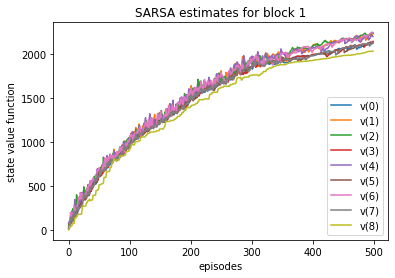

In [18]:
plt.plot(v_r)
plt.legend(['v('+ str(i)+')' for i in range(9)],loc='lower right')
plt.xlabel("episodes")
plt.ylabel("state value function")
plt.title("SARSA estimates for block 1")

In [19]:
env_b2 = envs.getBlock(1)
Q,V,pi2,Q_s = SARSA(env_b2,1,0.5,0.8,500)

In [20]:
print(pi2)

[6, 1, 2, 1, 4, 6, 6, 6, 1]


In [21]:
v_r= np.max(Q_s,axis=2)

Text(0.5, 1.0, 'SARSA estimates for block 2')

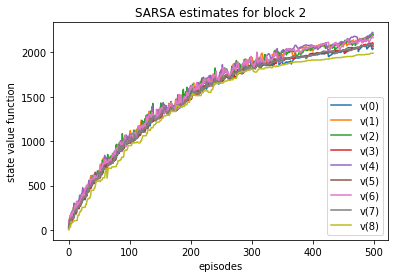

In [23]:
plt.plot(v_r)
plt.legend(['v('+ str(i)+')' for i in range(9)],loc='lower right')
plt.xlabel("episodes")
plt.ylabel("state value function")
plt.title("SARSA estimates for block 2")